In [1]:
#importing packages needed
import requests
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas as gpd

In [2]:
df_customers = pd.read_csv('enriched_customer_file.csv')
df_customers.head()

,Unnamed: 0,name,age,job,incomeUSD,creditScore,ccNumber,married,hasChildren,height,...,address.countryCode,height_inches,weight_pounds,bmi,health,healthy_bmi_range,income level,region,state_population,state_per_capita_income
0,0,Charolette Carroll,42,Anthropologist,71247,823,6007-2224-9881-3450,False,False,166.0,...,BD,65.354331,178.1640,29.32,Overweight,18.5 - 25,Middle income,Midwest,779094,"66,184"
1,1,Lizette Muller,45,Uber Driver,31092,639,6771-8987-0818-5229,True,True,171.0,...,US,67.322835,144.4275,22.40,Normal,18.5 - 25,Low income,West,7151502,"56,667"
2,2,Ezra Champlin,19,Nuclear Medicine Technologist,82922,558,3742-496036-15098,False,False,160.0,...,BN,62.992126,121.2750,21.48,Healthy weight,5 - 85,Middle income,Northeast,3605944,"84,972"
3,3,Luana Jacobi,23,Retired,16786,797,6767-8698-8214-3742-85,True,False,160.0,...,ZM,62.992126,109.3680,19.37,Normal,18.5 - 25,Low income,Northeast,20201249,"78,089"
4,4,Wilmer Skiles,33,Psychiatrist,122929,543,6709009668675160,True,True,175.0,...,RW,68.897638,145.5300,21.55,Normal,18.5 - 25,Middle income,West,7705281,"75,698"


In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               296 non-null    int64  
 1   name                     296 non-null    object 
 2   age                      296 non-null    int64  
 3   job                      296 non-null    object 
 4   incomeUSD                296 non-null    int64  
 5   creditScore              296 non-null    int64  
 6   ccNumber                 296 non-null    object 
 7   married                  296 non-null    bool   
 8   hasChildren              296 non-null    bool   
 9   height                   296 non-null    float64
 10  weight                   296 non-null    float64
 11  eyeColor                 296 non-null    object 
 12  email                    296 non-null    object 
 13  gender                   296 non-null    object 
 14  hasDegree                2

In [6]:
df_income = df_customers[['name','incomeUSD','address.state','region','income level','state_per_capita_income']]

df_health = df_customers[['name','height', 'weight','height_inches', 'weight_pounds', 'bmi',
       'health', 'healthy_bmi_range']]

In [7]:
df_health.head()

,name,height,weight,height_inches,weight_pounds,bmi,health,healthy_bmi_range
0,Charolette Carroll,166.0,80.8,65.354331,178.1640,29.32,Overweight,18.5 - 25
1,Lizette Muller,171.0,65.5,67.322835,144.4275,22.40,Normal,18.5 - 25
2,Ezra Champlin,160.0,55.0,62.992126,121.2750,21.48,Healthy weight,5 - 85
3,Luana Jacobi,160.0,49.6,62.992126,109.3680,19.37,Normal,18.5 - 25
4,Wilmer Skiles,175.0,66.0,68.897638,145.5300,21.55,Normal,18.5 - 25


In [9]:
health_counts = df_health['health'].value_counts()

print(health_counts)

health
Normal               165
Overweight            88
Healthy weight        18
Obese Class I         12
Mild Thinness          7
Severe Thinness        2
Obese Class II         2
Moderate Thinness      1
Name: count, dtype: int64


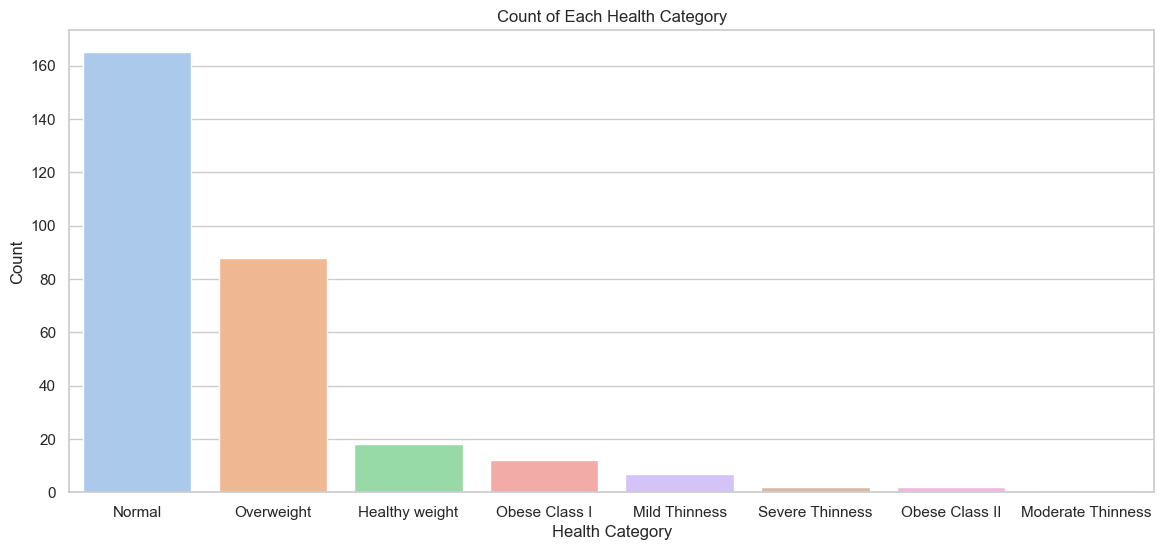

In [10]:
# Create a bar chart using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.barplot(x=health_counts.index, y=health_counts.values, palette="pastel")
plt.xlabel("Health Category")
plt.ylabel("Count")
plt.title("Count of Each Health Category")
plt.show()

In [11]:
mask = df_customers['health'].isin(['Overweight', 'Obese Class I', 'Obese Class II'])
filtered_df = df_customers[mask]

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 294
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               102 non-null    int64  
 1   name                     102 non-null    object 
 2   age                      102 non-null    int64  
 3   job                      102 non-null    object 
 4   incomeUSD                102 non-null    int64  
 5   creditScore              102 non-null    int64  
 6   ccNumber                 102 non-null    object 
 7   married                  102 non-null    bool   
 8   hasChildren              102 non-null    bool   
 9   height                   102 non-null    float64
 10  weight                   102 non-null    float64
 11  eyeColor                 102 non-null    object 
 12  email                    102 non-null    object 
 13  gender                   102 non-null    object 
 14  hasDegree                102 no

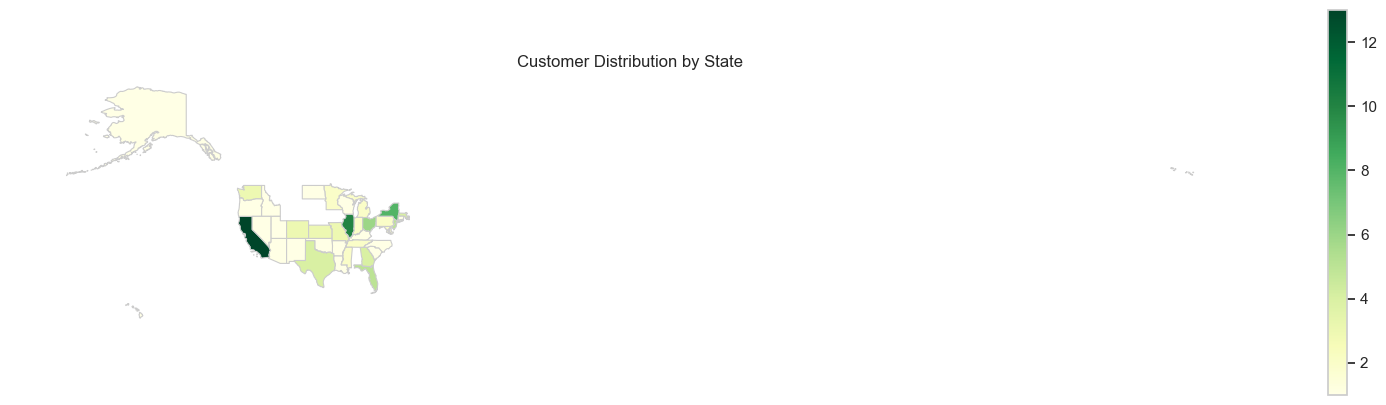

In [23]:
# Replace 'path_to_shapefile' with the actual path to your shapefile or GeoJSON file
us_states = gpd.read_file('data_file/cb_2016_us_state_20m/cb_2016_us_state_20m.shp')

# Group the data by state and count the number of customers in each state
state_counts = filtered_df['address.state'].value_counts()

# Fill NaN values (states without customers) with 0
#state_counts_df['count'].fillna(0, inplace=True)

# Merge the state_counts_df with the shapefile based on the "state" column
merged_data = us_states.merge(state_counts, left_on='NAME', right_on='address.state', how='left')

# Create the choropleth map with a larger size
plt.figure(figsize=(20, 5))  # Increase figure size for a larger map
ax = plt.gca()
merged_data.plot(column='count', cmap='YlGn', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax)

# Remove axis marker on the right side
ax.set_axis_off()

plt.title("Customer Distribution by State")
plt.show()

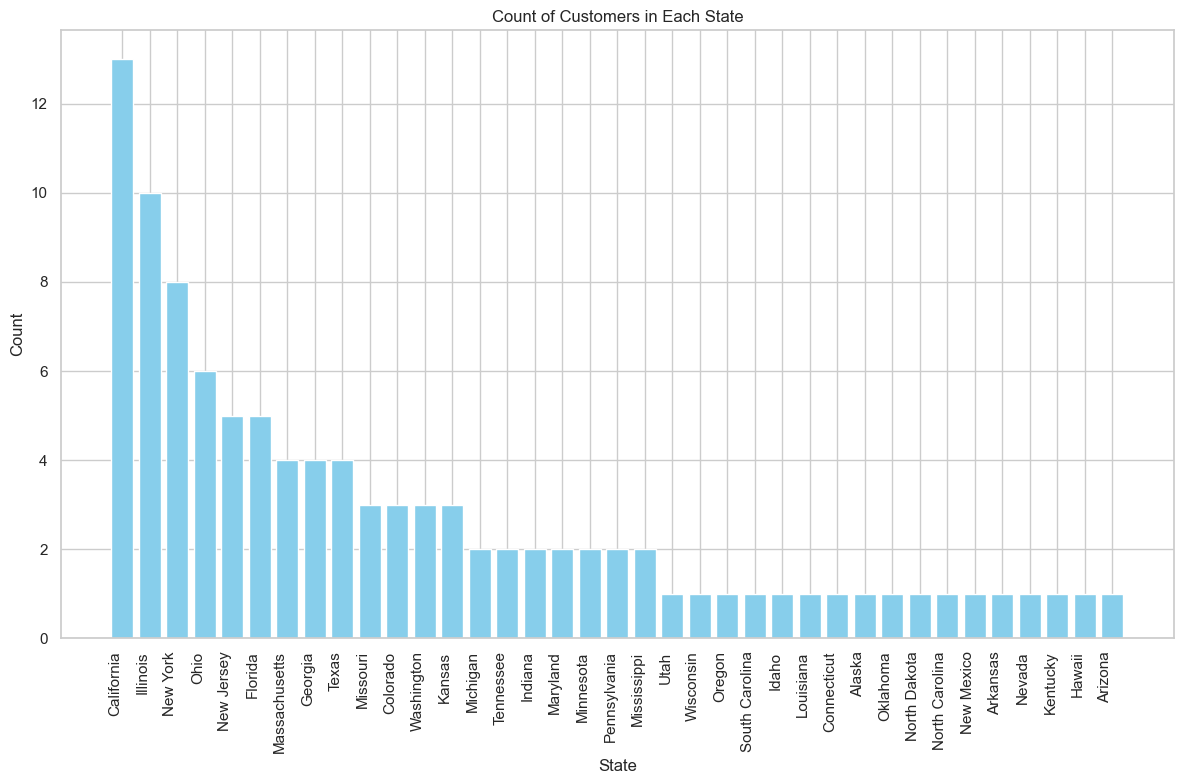

In [ ]:
# Sort the state_counts_df based on the count in descending order
state_counts_sorted = state_counts_df.sort_values(by='count', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(state_counts_sorted['address.state'], state_counts_sorted['count'], color='skyblue')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Customers in Each State")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

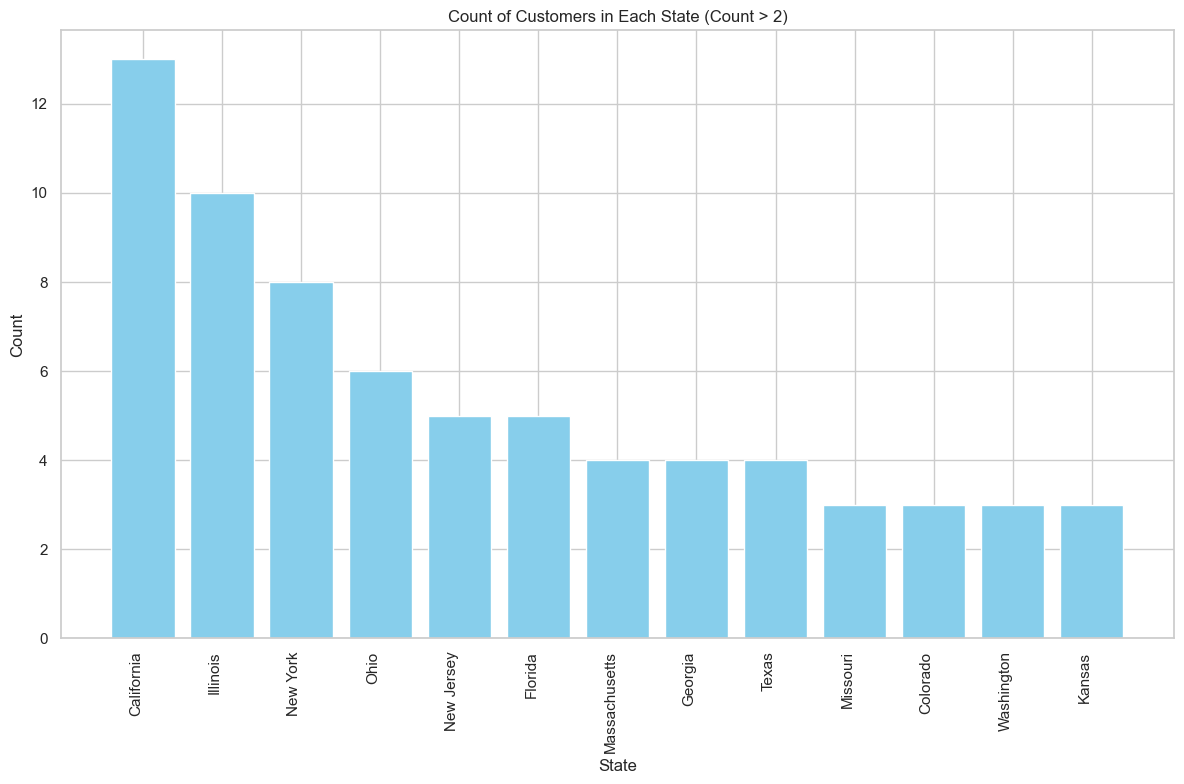

In [ ]:
# Filter states with count higher than 2
state_counts_filtered = state_counts_df[state_counts_df['count'] > 2]

# Sort the filtered data based on the count in descending order
state_counts_sorted = state_counts_filtered.sort_values(by='count', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(state_counts_sorted['address.state'], state_counts_sorted['count'], color='skyblue')
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Count of Customers in Each State (Count > 2)")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# First, create a new DataFrame with the deduplicated 'state' values and their corresponding population and income
deduplicated_df = df_customers[['address.state', 'state_population', 'state_per_capita_income']].drop_duplicates()

# Sort the DataFrame by 'State_population' in descending order (highest to lowest)
deduplicated_df.sort_values(by='state_population', ascending=False, inplace=True)

# Reset the index and remove it from the DataFrame (optional step)
deduplicated_df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame with the sorted values
print(deduplicated_df)

     address.state  state_population state_per_capita_income
0       California          39538223                  77,339
1            Texas          29145505                  61,985
2          Florida          21538187                  63,597
3         New York          20201249                  78,089
4     Pennsylvania          13002700                  65,167
5         Illinois          12812508                  68,822
6             Ohio          11799448                  57,880
7          Georgia          10711908                  57,129
8   North Carolina          10439388                  57,416
9         Michigan          10077331                  56,813
10      New Jersey           9288994                  78,700
11        Virginia           8631393                  68,211
12      Washington           7705281                  75,698
13         Arizona           7151502                  56,667
14   Massachusetts           7029917                  84,945
15       Tennessee      

In [29]:
top_five = ['Illinois', 'California', 'New York', 'Ohio' ,'New Jersey']
top5_data = deduplicated_df[deduplicated_df['address.state'].isin(top_five)]
print(top5_data)

   address.state  state_population state_per_capita_income
0     California          39538223                  77,339
3       New York          20201249                  78,089
5       Illinois          12812508                  68,822
6           Ohio          11799448                  57,880
10    New Jersey           9288994                  78,700


In [30]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 294
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               102 non-null    int64  
 1   name                     102 non-null    object 
 2   age                      102 non-null    int64  
 3   job                      102 non-null    object 
 4   incomeUSD                102 non-null    int64  
 5   creditScore              102 non-null    int64  
 6   ccNumber                 102 non-null    object 
 7   married                  102 non-null    bool   
 8   hasChildren              102 non-null    bool   
 9   height                   102 non-null    float64
 10  weight                   102 non-null    float64
 11  eyeColor                 102 non-null    object 
 12  email                    102 non-null    object 
 13  gender                   102 non-null    object 
 14  hasDegree                102 no

In [34]:
# Calculate the average income for each state
average_income_by_state = filtered_df.groupby('address.state')['incomeUSD'].mean().round(0)

# Display the average income for each state
print(average_income_by_state)

address.state
Alaska             93694.0
Arizona            31975.0
Arkansas           37932.0
California         81241.0
Colorado           71595.0
Connecticut        82153.0
Florida            68824.0
Georgia            79414.0
Hawaii             36714.0
Idaho              73300.0
Illinois           74372.0
Indiana            71232.0
Kansas             60209.0
Kentucky           87668.0
Louisiana          54785.0
Maryland           37062.0
Massachusetts      57479.0
Michigan           96564.0
Minnesota          74388.0
Mississippi       115928.0
Missouri           63506.0
Nevada             68647.0
New Jersey         45571.0
New Mexico         86234.0
New York           53986.0
North Carolina     50302.0
North Dakota       71247.0
Ohio               72341.0
Oklahoma               0.0
Oregon             55551.0
Pennsylvania       90681.0
South Carolina     67567.0
Tennessee          38810.0
Texas              70065.0
Utah               37585.0
Washington         45607.0
Wisconsin     

In [39]:
# Merge the 'top_five' DataFrame with the 'average_income_by_state' Series based on 'address.state'
top_five = top5_data.merge(average_income_by_state, left_on='address.state', right_index=True, how='left')

top_five.rename(columns={'incomeUSD': 'avg customer income'}, inplace=True)

# Display the updated 'top_five' DataFrame with the 'average_income_by_state' column added
print(top_five)

   address.state  state_population state_per_capita_income  \
0     California          39538223                  77,339   
3       New York          20201249                  78,089   
5       Illinois          12812508                  68,822   
6           Ohio          11799448                  57,880   
10    New Jersey           9288994                  78,700   

    avg customer income  
0               81241.0  
3               53986.0  
5               74372.0  
6               72341.0  
10              45571.0  


This is a potentially interesting finding to the client. New Jersey is in the top 5 purchases from those clients classified as overweight or obese, despite it being a smaller population base. Additionally, the average income of a New Jersey purchaser from the beta group is significantly lower than the state per capita income. This could be a great opportunity to try additional marketing through means of appealing to that customer base while in New Jersey. Target areas of the state where the income is lower with more marketing spend that those of higher affluence. 

## Findings
- This is a potentially interesting finding to the client. New Jersey is in the top 5 purchases from those clients classified as overweight or obese, despite it being a smaller population base. Additionally, the average income of a New Jersey purchaser from the beta group is significantly lower than the state per capita income. This could be a great opportunity to try additional marketing through means of appealing to that customer base while in New Jersey. Target areas of the state where the income is lower with more marketing spend that those of higher affluence.  

In [41]:
top_five.head()

,address.state,state_population,state_per_capita_income,avg customer income
0,California,39538223,"77,339",81241.0
3,New York,20201249,"78,089",53986.0
5,Illinois,12812508,"68,822",74372.0
6,Ohio,11799448,"57,880",72341.0
10,New Jersey,9288994,"78,700",45571.0
